# Part 1

In [1]:
from database import Database
import pandas as pd
import re

In [2]:
credentials = {
    "host": "",
    "database": "aact",
    "user": "xc383@drexel.edu",
    "password": ""
}

In [3]:
db = Database(**credentials)
db.connect()

print("Querying database")
df = db.execute(sql="select current_timestamp", expecting_return=True)
print(df)

print("Disconnecting from database")
db.disconnect()

Querying database
                 current_timestamp
0 2023-11-19 23:41:58.246065+00:00
Disconnecting from database


In [4]:
x = db.execute_yield("SELECT setseed(.5); SELECT e.nct_id, EXTRACT( YEAR FROM s.start_date ) AS start_year, e.criteria FROM eligibilities e JOIN studies s ON e.nct_id = s.nct_id WHERE EXTRACT( YEAR FROM s.start_date ) > 2020 ORDER BY RANDOM() LIMIT 385;")

In [5]:
next(x)

{'nct_id': 'NCT04729361',
 'start_year': 2021.0,
 'criteria': 'Inclusion Criteria:\n\npregnant women\nfetus with an isolated intra-uterine growth restriction (IUGR) severe (bellow the third percentile on CFEF curves) and early (between 21 and 24 gestational weeks).\n\nExclusion Criteria:\n\nassociated IUGR (with other abnormalities during prenatal screening)'}

In [6]:
df = pd.DataFrame(x)
df.head(2)

,nct_id,start_year,criteria
0,NCT05564858,2022.0,Inclusion Criteria\n\nSubjects fully understan...
1,NCT05142228,2022.0,Inclusion Criteria:\n\nIn order to be eligible...


In [7]:
text = df.iloc[11, 2]
print(text)

Inclusion Criteria:

Hospital patients who were referred for chest radiography between August 15 and 17, 2022.

Exclusion Criteria:

Pediatric CXR images (under 18 years of age)
Scans with technical problems (poor image quality, rotation)
Images in lateral projection


In [11]:
text = """
Key Inclusion Criteria:

Participant must be at least 12 weeks completed age and must not have completed 6 months at the time of administration of first dose.
If the participant has a chronic, stable disease, they may be eligible to enroll in Part 2, but ineligible for Part 1. The chronic condition (for example, gastroesophageal reflux disease) should be stable, per investigator assessment, so that the participant can be considered eligible for inclusion in Part 2.
Participant was born at ≥37 weeks gestation (Part 1) or ≥34 weeks gestation (Part 2), with a minimum birth weight of 2.5 kilograms (kg), without fetal growth restriction, and the participant's height and weight are both at or above the second percentile for age according to the Centers for Disease Control and Prevention/World Health Organization Child Growth Standard at the Screening Visit.
In the investigator's opinion, the parent(s)/legally authorized representative(s) understand and are willing and physically able to comply with protocol-mandated follow-up, including all procedures, and provide written informed consent.

Key Exclusion Criteria:

Participant has a known history of SARS-CoV-2 infection within 2 weeks prior to administration of study drug or has a known close contact in the past 2 weeks to someone diagnosed with SARS-CoV-2 infection or coronavirus disease 2019 (COVID-19). Participants may be rescreened after 14 days provided that they remain asymptomatic.
Participant is acutely ill or febrile 72 hours prior to or at the Screening Visit. Fever is defined as a body temperature ≥38.0°Celcius/≥100.4°Farenheit. Participants who meet this criterion may have visits rescheduled within the relevant study visit windows. Afebrile participants with minor illnesses can be enrolled at the discretion of the investigator.
Participant has previously been administered an investigational or approved CoV (for example, SARS-CoV-2, SARS-CoV, Middle East respiratory syndrome [MERS]-CoV) vaccine.
Participant has undergone treatment with investigational or approved agents for prophylaxis against COVID-19 (for example, receipt of SARS-CoV-2 monoclonal antibodies) within 90 days prior to enrollment.
Participant has a known hypersensitivity to a component of the vaccine or its excipients. Hypersensitivity includes, but is not limited to, anaphylaxis or immediate allergic reaction of any severity to any of the components of messenger ribonucleic acid (mRNA) COVID-19 vaccines (including polyethylene glycol or immediate allergic reaction of any severity to polysorbate).
Participant has a medical, psychiatric, or occupational condition, that, according to the investigator's judgment, may pose additional risk as a result of participation, interfere with safety assessments, or interfere with interpretation of results.
Participant has a history of diagnosis or condition that, in the judgment of the investigator, may affect study endpoint assessment or compromise participant safety.

Participant has received the following:

Any routine vaccination with inactivated or live vaccine(s) within 14 days prior to first or second vaccination or plans to receive such a vaccine within 14 days of any study vaccination.
Systemic immunosuppressants or immune-modifying drugs (including maternal use during pregnancy or lactation) for >14 days in total within 6 months prior to the day of enrollment (for corticosteroids, ≥ 1 milligrams (mg)/kg/day or, if participant weighs >10 kg: ≥10 mg/day prednisone equivalent). Participants may have visits rescheduled for enrollment if they no longer meet this criterion within the Screening Visit window. Inhaled, nasal, and topical steroids are allowed.
Intravenous or subcutaneous blood products (red blood cells, platelets, immunoglobulins) within 3 months prior to enrollment.
Participant has participated in an interventional clinical study within 28 days prior to the Screening Visit or plans to do so while participating in this study, or maternal participation in an interventional clinical study during pregnancy.

Note: Other inclusion and exclusion criteria may apply.

Key Inclusion Criteria:

Participant is male or female, between 2 and <6 months of age at the time of consent (Screening Visit), who is in good general health, in the opinion of the investigator, based on review of medical history and screening physical examination.
"""

In [62]:
x = re.finditer(r"\n?(\w{2}clusion)\s+[Cc]riteria\S?\n", text)

In [84]:
t = """
Participant must be at least 12 weeks completed age and must not have completed 6 months at the time of administration of first dose.
If the participant has a chronic, stable disease, they may be eligible to enroll in Part 2, but ineligible for Part 1. The chronic condition (for example, gastroesophageal reflux disease) should be stable, per investigator assessment, so that the participant can be considered eligible for inclusion in Part 2.
Participant was born at ≥37 weeks gestation (Part 1) or ≥34 weeks gestation (Part 2), with a minimum birth weight of 2.5 kilograms (kg), without fetal growth restriction, and the participant's height and weight are both at or above the second percentile for age according to the Centers for Disease Control and Prevention/World Health Organization Child Growth Standard at the Screening Visit.
In the investigator's opinion, the parent(s)/legally authorized representative(s) understand and are willing and physically able to comply with protocol-mandated follow-up, including all procedures, and provide written informed consent.

Key
"""

In [106]:
x = re.finditer(r"\n", t)
y = next(x)

In [13]:
criteria = set(re.findall(r"\n?(\w{2}clusion)\s+[Cc]riteria\S?\n", text))
blocks = re.split("(?:" + "|".join(criteria) + ")\\s+[Cc]riteria\\S?", text)
sections = {"_".join(re.split(r"\s+", str(k).lower())): v for k, v in zip(criteria, list(filter(lambda x: x != "", blocks))[len(blocks)-len(criteria):])}

In [45]:
text = db.execute("select nct_id, criteria from eligibilities where nct_id = 'NCT01010724';", True).iloc[0, 1]
print(text)

Inclusion Criteria:

Male or non-pregnant, non-lactating female patients of any race in the ages of >18 years. Women must be of non-childbearing potential.
Patients scheduled for coronary artery bypass surgery with CPB.
Patients must have a EuroSCORE (Appendix I) of >2 and <6.
Patients who have given written informed consent prior to participation in the trial and who undertake to comply with the protocol.

Exclusion Criteria:

Patients who are unwilling or unable to be fully evaluated for follow-up.
Patients who undergo CABG for emergency due to complications from percutaneous transluminal coronary angioplasty (PTCA)/ catheterization, unstable angina or ongoing myocardial infarction.

Patients who have base alkaline phosphatase levels at > 100 IU/l (70 IU/L as mean concentration) levels, or levels < 30 IUnits/L (ammediol, DEA units)

(values base levels in glycine units at pH9.6 and 25 C are respectively >40 and < 12 IU/L).

Patients who show pre-operative infections or who are suspec

In [41]:
"".join(re.split("\\s+", "inclusion"))

'inclusion'

In [42]:
breakdown_criteria_text(db.execute("select nct_id, criteria from eligibilities where nct_id = 'NCT00382330';", True).iloc[0, 1])

{'inclusion': ['',
  'Patients between the ages 18 and 75 years.',
  'Patients may be carriers of the Human Immunodeficiency Virus (HIV).',
  'Patients must have been diagnosed with precancerous lesion(s) of the vulva by tissue sampling (biopsy-proven vulvar intraepithelial neoplasia grade II or III)',
  'Patients must be able to come to University Hospital for their initial appointment in Gynecologic Oncology Clinic, and for the eight follow-up visits in that Clinic required by the protocol.',
  ''],
 'exclusion': ['',
  'Pregnant or patients who are breast feeding a baby.',
  'Patients who have been diagnosed with a vaginal yeast infection.',
  'Patients who have undergone prior surgery for precancerous lesion(s) of the vulva.']}

In [51]:
#!/usr/bin/env python
"""
File: metamap_parser.py
Author: xc383@drexel.edu
Date: 2023-10-27
Purpose: A parser for metamap JSONs.
"""

import re
from collections import defaultdict

def breakdown_criteria_text(text: str) -> dict[str, str]:
    """
    Breakdown a criteria specification text into sections. Will parse into list of criteria sections.
    :param text (str): A text to parse.
    :returns: A dict of sections.
    """
    criteria_types = re.findall(r"\n?.*((?:[Ii]n|[Ee]x)clusion).*[Cc]riteria\S?\n", text)
    blocks = re.split(r"\n?.*(?:[Ii]n|[Ee]x)clusion.*[Cc]riteria\S?\n", text)[1:]

    section_blocks = defaultdict(list)
    sections = {}

    for k, v in zip(criteria_types, blocks):
        section_blocks[k.lower()].append(v)
    for k, v in section_blocks.items():
        sections[k] = "\n".join(v)

    for k, v in sections.items():
        sections[k] = tolines(v)

    return sections

def tolines(text: str) -> list[str]:
    """
    Break appart all newlines. Will conflat multiple newlines together in splitting.
    :param text (str): A text to split.
    :returns: A list of strings.
    """
    if text is None:
        return None
    newlines_break = re.compile(r"\n+")
    return re.split(newlines_break, text)

def check_valid(text: str) -> bool:
    """
    Check if a text is valid.
    :param text (str): A text to check.
    :returns: A boolean true if valid and false otherwise.
    """
    return True

def filter_criteria(text: str) -> bool:
    return text != ""

def process_criteria(text: str, min_length: int=10) ->list[tuple]:
    """
    Process a critera into tuples. Each resulting tuple contains the (criteria type, section index, criteria text).
    :param text (str): A text to parse.
    :param min_length (int): Optional, the single criteria length threshold. All criteria with less than this many charecters is removed. Defaults to 10.
    :returns: A list of tuples.
    """
    criteria = []
    sections = breakdown_criteria_text(text)

    for key in sections.keys():
        cnt = 0
        values = sections.get(key)
        if values is None:
            continue
        for val in values:
            if filter_criteria(val):
                criteria.append([key, cnt, val])
                cnt += 1

    return criteria


In [ ]:
from collections import defaultdict

def get_sections(text: str):
    section_blocks = []
    matches = re.finditer(r"\n?(\w{2}clusion)\s+[Cc]riteria\S?\n", text)

    prev_match = next(matches)
    section_blocks.append( (prev_match.groups()[0].lower(), *prev_match.span()))

    for match in matches:
        section_blocks[-1] = ( *section_blocks[-1],  text[section_blocks[-1][-1]:match.span()[0]] )
        section_blocks.append( (match.groups()[0].lower(), *match.span()) )

    section_blocks[-1] = ( *section_blocks[-1],  text[section_blocks[-1][-1]:] )

    return section_blocks

def parse_lines(text, filter_statement=lambda x: True):
    lines = [(0)]

    for i in range(len(text)):
        if text[i] == "\n" and filter_statement(text[lines[-1]:i]):
            lines[-1] = (lines[-1], i, text[lines[-1]:i])
            lines.append(i+1)
    lines[-1] = (lines[-1], len(text))

    if text[0] == "\n":
        lines.pop(0)

    return lines

def process_criteria(text, filter_statement=lambda x: True):
    sections = get_sections(text)
    lines = []
    for section in sections:
        for line in parse_lines(section[-1], filter_statement):
            lines.append((section[0], section[2] + line[0], line[1] - line[0], line[-1]))

    return lines

In [53]:
process_criteria(text)

[['inclusion',
  0,
  'Participant must be at least 12 weeks completed age and must not have completed 6 months at the time of administration of first dose.'],
 ['inclusion',
  1,
  'If the participant has a chronic, stable disease, they may be eligible to enroll in Part 2, but ineligible for Part 1. The chronic condition (for example, gastroesophageal reflux disease) should be stable, per investigator assessment, so that the participant can be considered eligible for inclusion in Part 2.'],
 ['inclusion',
  2,
  "Participant was born at ≥37 weeks gestation (Part 1) or ≥34 weeks gestation (Part 2), with a minimum birth weight of 2.5 kilograms (kg), without fetal growth restriction, and the participant's height and weight are both at or above the second percentile for age according to the Centers for Disease Control and Prevention/World Health Organization Child Growth Standard at the Screening Visit."],
 ['inclusion',
  3,
  "In the investigator's opinion, the parent(s)/legally authori

In [15]:
import pandas as pd

In [16]:
with_colons = pd.read_csv("tmp.csv")
without_colons = pd.read_csv("sample.csv")

In [17]:
list(map(print, with_colons.loc[with_colons.text.apply(lambda x: x[-1]) == ":"].nct_id.unique()))
1

NCT01529099
NCT05423418
NCT03575455
NCT02510235
NCT01529164
NCT03712982
NCT05375617
NCT04648696
NCT01048229
NCT05351606
NCT04112602
NCT03574363
NCT03780387
NCT05323292
NCT05303636


1

NCT01529099

NCT05423418

NCT03575455

NCT02510235

NCT01529164

NCT03712982

NCT05375617

NCT04648696

NCT01048229

NCT05351606

NCT04112602

NCT03574363

NCT03780387

NCT05323292

NCT05303636

In [18]:
with_colons.loc[with_colons.nct_id=="NCT05323292"].text.apply(print)

Willing to provide informed consent.
Willing to comply with all study procedures and be available for the duration of the study.
Ability to take oral medication.
At least 18 years of age.
Leukoplakia study groups:
Leukoplakia due to hyperkeratosis with dysplasia: biopsy-confirmed diagnosis of hyperkeratosis with dysplasia.
Leukoplakia due to hyperkeratosis with no dysplasia: biopsy-confirmed diagnosis of hyperkeratosis with no dysplasia.
Control group: Laryngoscopy showing no evidence of vocal fold mucosal disease.
History of malignant vocal fold mucosal pathology.
History of metabolic or liver disorder.
History of anorexia or bulimia.
Pregnant, lactating, or planning on becoming pregnant during the study period.
History of >4.5 kg weight loss in the past 90 days.
Medical or other inability to complete an 8 hour fast.
Acute respiratory or gastrointestinal illness.
Currently incarcerated.
Impaired decision-making capacity.
No or limited English speaking ability; illiterate or low-litera

56948    None
56949    None
56950    None
56951    None
56952    None
         ... 
61781    None
61782    None
61783    None
61784    None
61785    None
Name: text, Length: 105, dtype: object

# Part 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
#df = pd.read_csv("/home/xc383@drexel.edu/text2graph/data/criteria/csv/sample.csv", header=None)
df = pd.read_csv("/home/xc383@drexel.edu/text2graph/experiments/criteria/sample.csv", header=None, encoding="latin-1")
df.columns = ["nct_id", "year", "criteria_type", "sequence_id", "text"]

df.head()

,nct_id,year,criteria_type,sequence_id,text
0,NCT05858073,2023.0,inclusion,0,Those with neck pain
1,NCT05858073,2023.0,inclusion,1,Being between 18-60 years old
2,NCT05858073,2023.0,exclusion,0,Hypertension
3,NCT05858073,2023.0,exclusion,1,Cardiopulmonary disease
4,NCT05858073,2023.0,exclusion,2,Pregnancy


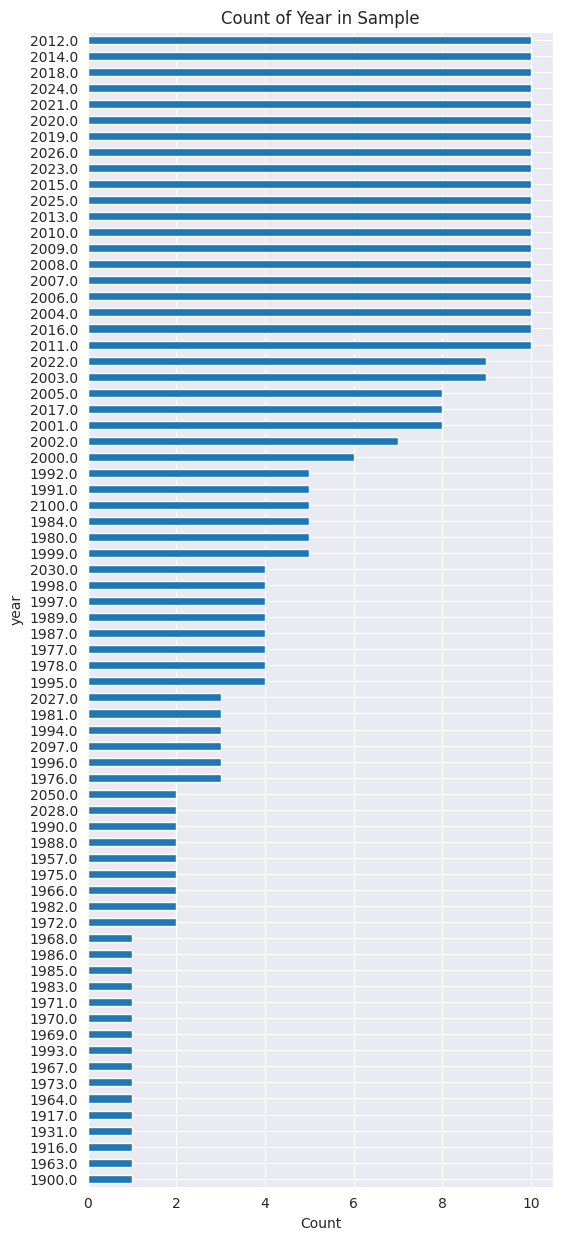

In [44]:
fig, ax = plt.subplots(figsize=(6, 15))
df.groupby(["year", "nct_id"]).count().reset_index().value_counts("year").sort_values(ascending=True).plot.barh(title="Count of Year in Sample", xlabel="Count")

plt.show()

In [9]:
df.value_counts("year")

year
2023.0    208
2020.0    192
2005.0    168
2025.0    166
2019.0    132
         ... 
1968.0      2
1970.0      2
1971.0      2
1973.0      2
1969.0      2
Name: count, Length: 71, dtype: int64

In [7]:
df.value_counts(["year", "criteria_type"])

year    criteria_type                                                                                                                                                                                                                                                                                                                                                                                    
2023.0  exclusion                                                                                                                                                                                                                                                                                                                                                                                            134
2020.0  exclusion                                                                                                                                                                                            

In [25]:
df.value_counts(["nct_id", "criteria_type"]).describe()

count    724.000000
mean       5.940608
std        5.604341
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       38.000000
Name: count, dtype: float64

In [30]:
pd.concat([df.loc[df.criteria_type=="inclusion"].groupby(["nct_id"]).count().text.rename("inclusion").describe(), df.loc[df.criteria_type=="exclusion"].groupby(["nct_id"]).count().text.rename("exclusion").describe()], axis=1)

,inclusion,exclusion
count,366.000000,358.000000
mean,4.576503,7.335196
std,3.909019,6.642908
min,1.000000,1.000000
25%,2.000000,3.000000
50%,4.000000,5.000000
75%,6.000000,9.000000
max,35.000000,38.000000


In [31]:
grouped_conditions = df[df.text.apply(lambda x: x[-1] == ":")].reset_index()

grouped_conditions.apply(lambda x: print(x["nct_id"], "-", x["criteria_type"], "-", x["sequence_id"], ":", x["text"]), axis=1)
print("\n\nThere are %d (%.2f%%) criteria ending in a colon." % (len(df[df.text.apply(lambda x: x[-1] == ":")]), len(df[df.text.apply(lambda x: x[-1] == ":")]) / len(df) * 100))

NCT04866511 - inclusion - 0 : - Participants must:
NCT04866511 - exclusion - 0 : - Participants will be excluded from the study if:
NCT02188745 - exclusion - 5 : History of any of the following:
NCT05803772 - exclusion - 17 : Abnormal liver function tests:
NCT01762202 - exclusion - 10 : One or more laboratory abnormalities:
NCT00697957 - inclusion - 0 : Random population-based sample of women:
NCT02343367 - exclusion - 0 : A child will be excluded if he/she has:
NCT02355431 - inclusion - 2 : A mGPS of 1 or 2 as defined below:
NCT02619253 - inclusion - 0 : In order to be eligible for participation in this trial, the subject must:
NCT02619253 - inclusion - 1 : Have one of the following diagnoses/conditions:
NCT02619253 - exclusion - 0 : The subject must be excluded from participating in the trial if the subject:
NCT02576041 - exclusion - 18 : Treatment with: diuretics, corticosteroids (other than medication applied topically), central nervous system medications or medications with sedati

In [48]:
i = 3
nct_id, criteria_type, sequence_id = grouped_conditions.loc[i, ["nct_id", "criteria_type", "sequence_id"]]

df.loc[((df.nct_id==nct_id) & (df.criteria_type==criteria_type) & (df.sequence_id >= sequence_id))].text.apply(print)
1

Abnormal liver function tests:
Transaminases: Alanine aminotransferase (ALT) ≥ 3x upper limit of normal (ULN); or Aspartate aminotransferase (AST) ≥ 3x ULN;
or Alkaline phosphatase (ALK) ≥2.5 x ULN
or Total bilirubin ≥2 x ULN
Stage 4 hypertension (systolic blood pressure (SBP) ≥ 180, diastolic BP (DBP) ≥ 110)
History or presence of any uncontrolled cardiovascular, pulmonary, hepatobiliary, renal, hematological, gastrointestinal, endocrinologic, immunologic, dermatologic, neurological, psychiatric, metabolic, musculoskeletal, or malignant disease (except conditions accepted for inclusion) which the clinical investigator considers a disqualification for participation in the study.
Prior or current treatment with drugs aimed to treat abnormal glucose homeostasis including oral antidiabetics, incretin analogues and/or insulin.
History of uncontrolled illness (e.g. depression, psychosis) or behaviour that at the discretion of the investigator might confound the study results or pose additio

1

In [33]:
import os

def write_criteria(criteria_tuple, path=".", file_type=None):
    file_name = "_".join(map(str, criteria_tuple[:-1]))
    if file_type is not None:
        file_name = file_name + "." + file_type
    with open(os.path.join(path, file_name), "w") as fd:
        fd.write(criteria_tuple[-1])
    return file_name

In [34]:
write_row = lambda x: write_criteria(x, "/home/xc383@drexel.edu/text2graph/data/criteria/files_for_parsing", "txt")
files = [write_row(x) for x in df.values.tolist()]

~/text2graph/frameworks/apache-ctakes-4.0.0.1/bin/runClinicalPipeline.sh -i /home/xc383@drexel.edu/text2graph/data/criteria/files_for_parsing --xmiOut /home/xc383@drexel.edu/text2graph/data/criteria/ctakes --key $UMLS_KEY --user $UMLS_USER --pass $UMLS_PASS -l org/apache/ctakes/dictionary/lookup/fast/umls_2021ab_default.xml


time python ~/text2graph/experiments/ctakes/ctakes_parser.py -i /home/xc383@drexel.edu/text2graph/data/criteria/ctakes /home/xc383@drexel.edu/text2graph/data/criteria/concepts

In [35]:
concepts = pd.read_csv("/home/xc383@drexel.edu/text2graph/data/criteria/concepts/ctake_concepts.csv")

In [38]:
concepts

,file,start,end,subject,polarity,uncertainty,confidence,conditional,generic,history,concept_scheme,concept_cui,concept_tui,concept_text,concept_score,concept_disambiguated
0,NCT02821338_exclusion_18.txt.xmi,6,14,patient,1,0,0.0,False,False,0,snomedct_us,C4049936,T033,"Patient status determination, deceased and bod...",0.0,False
1,NCT02821338_exclusion_18.txt.xmi,33,41,patient,1,0,0.0,False,False,0,snomedct_us,C4049936,T033,"Patient status determination, deceased and bod...",0.0,False
2,NCT02821338_exclusion_18.txt.xmi,0,14,patient,1,0,0.0,False,False,0,snomedct_us,C4316802,T059,Whole blood unit collection,0.0,False
3,NCT02821338_exclusion_18.txt.xmi,91,100,patient,1,0,0.0,False,False,0,snomedct_us,C0220908,T060,Screening procedure,0.0,False
4,NCT01826773_inclusion_3.txt.xmi,17,21,patient,1,0,0.0,False,False,0,snomedct_us,C1299581,T033,Able (finding),0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17530,NCT02387671_exclusion_0.txt.xmi,46,52,patient,1,0,0.0,False,False,0,snomedct_us,C0006826,T191,Malignant Neoplasms,0.0,False
17531,NCT02387671_exclusion_0.txt.xmi,76,85,patient,1,0,0.0,False,False,0,snomedct_us,C0012634,T047,Disease,0.0,False
17532,NCT02387671_exclusion_0.txt.xmi,54,62,patient,1,0,0.0,False,False,0,snomedct_us,C1971624,T033,Loss of appetite (finding),0.0,False
17533,NCT00996424_exclusion_2.txt.xmi,60,75,patient,1,0,0.0,False,False,0,snomedct_us,C0010674,T047,Cystic Fibrosis,0.0,False


In [39]:
df["file"] = df.apply(lambda x: "_".join(map(str, x[:3])) + ".txt.xmi", axis=1)
df.loc[~df.file.isin(concepts.file.unique())]

,nct_id,criteria_type,sequence_id,text,file
0,NCT03330314,inclusion,0,Females must be non-pregnant and non-lactating,NCT03330314_inclusion_0.txt.xmi
61,NCT01590251,inclusion,0,18 years of age or older,NCT01590251_inclusion_0.txt.xmi
97,NCT05582668,inclusion,0,Signed informed consent,NCT05582668_inclusion_0.txt.xmi
98,NCT05582668,inclusion,1,Age 65 years or older,NCT05582668_inclusion_1.txt.xmi
143,NCT03415893,exclusion,0,patients under 12 years old,NCT03415893_exclusion_0.txt.xmi
...,...,...,...,...,...
798383,NCT00002180,exclusion,7,Patients who are receiving:,NCT00002180_exclusion_7.txt.xmi
798386,NCT00002180,exclusion,10,Within 2 weeks prior to entry:,NCT00002180_exclusion_10.txt.xmi
802685,NCT05851807,inclusion,0,The Informed Consent Form must be signed by th...,NCT05851807_inclusion_0.txt.xmi
802686,NCT05851807,inclusion,1,Being over 18 years old,NCT05851807_inclusion_1.txt.xmi


In [40]:
round(len(df.loc[~df.file.isin(concepts.file.unique())].file.drop_duplicates()) / len(concepts.file.unique()) * 10, 2)

1.8

In [41]:
full_concepts = pd.merge(df, concepts, on="file")
full_concepts.value_counts(["nct_id", "criteria_type", "sequence_id"]).describe()

count    3644.000000
mean        4.812020
std         4.920846
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        54.000000
Name: count, dtype: float64

In [32]:
pd.concat([
    full_concepts.loc[full_concepts.criteria_type=="inclusion"].value_counts(["nct_id", "criteria_type", "sequence_id"]).rename("inclusion").describe(),
    full_concepts.loc[full_concepts.criteria_type=="exclusion"].value_counts(["nct_id", "criteria_type", "sequence_id"]).rename("exclusion").describe()
], axis=1)

,inclusion,exclusion
count,347.000000,712.000000
mean,3.775216,5.466292
std,3.261470,5.497882
min,1.000000,1.000000
25%,1.000000,2.000000
50%,3.000000,3.000000
75%,5.000000,7.000000
max,22.000000,42.000000


In [42]:
import math

sample_size = 385
pop_size = 470365

mean_n_criteria = 5.940608
mean_n_concepts = 4.812020

std_n_criteria = 5.604341
std_n_concepts = 4.920846

me_n_criteria = 1.96 * std_n_criteria / math.sqrt(sample_size)
me_n_concepts = 1.96 * std_n_concepts / math.sqrt(sample_size)

In [43]:
upper_bounds_total_estimate_n_criteria = round(pop_size * (mean_n_criteria + me_n_criteria))
center_total_estimate_n_criteria = round(pop_size * (mean_n_criteria))
print("We can estimate there will be {:,} (+-{:,}) criteria.".format(center_total_estimate_n_criteria, upper_bounds_total_estimate_n_criteria - center_total_estimate_n_criteria))

We can estimate there will be 2,794,254 (+-263,321) criteria.


In [44]:
upper_bounds_total_estimate_n_concepts = round(center_total_estimate_n_criteria * (mean_n_criteria + me_n_concepts))
center_total_estimate_n_concepts = round(center_total_estimate_n_criteria * (mean_n_concepts))
print("We can estimate there will be {:,} (+-{:,}) criteria.".format(center_total_estimate_n_concepts, upper_bounds_total_estimate_n_concepts - center_total_estimate_n_concepts))

We can estimate there will be 13,446,006 (+-4,527,070) criteria.
